# Importing Libraries :-

In [1]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Importing :-

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "C:/Users/Mohamad Sameer S/Desktop/Data"

classes = os.listdir(dir_example)
print(classes)

['Test', 'Train']


In [9]:
dir_example = "C:/Users/Mohamad Sameer S/Desktop/Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


# Data Exploration :-

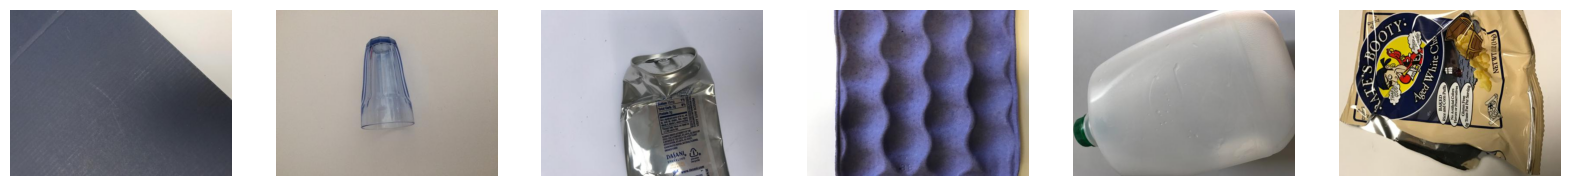

In [11]:
dir_with_examples = 'C:/Users/Mohamad Sameer S/Desktop/Data/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

# Data Configuration :-

In [12]:
train = 'C:/Users/Mohamad Sameer S/Desktop/Data/Train'
test = 'C:/Users/Mohamad Sameer S/Desktop/Data/Test'

# Preparing the Data :-

### Creating a Generator for Training Set :

In [13]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 526 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [14]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

### Creating a Generator for Testing Set :

In [15]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 526 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [16]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

# Writing the labels into a text file '*Labels.txt* ' :-

In [17]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# Model Creation :-

In [18]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

C:\Users\Mohamad Sameer S\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,803,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,843,910 (10.85 MB)

 Trainable params: 2,843,910 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation :-

In [22]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training the Model :-

## (batch_size = 32, epochs = 10)

In [24]:
model.fit(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)


C:\Users\Mohamad Sameer S\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 227ms/step - accuracy: 0.2238 - loss: 1.8519
Epoch 2/10


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.2687 - loss: 1.7443
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - accuracy: 0.3078 - loss: 1.6432
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - accuracy: 0.3652 - loss: 1.5945
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - accuracy: 0.3771 - loss: 1.5231
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - accuracy: 0.4127 - loss: 1.4397
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - accuracy: 0.4230 - loss: 1.3994
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - accuracy: 0.4642 - loss: 1.3195
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.5089 - loss: 1.2742
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - accuracy: 0.5107 - loss: 1.1867


# Testing Predictions :-

In [25]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Probability: 0.6035001
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

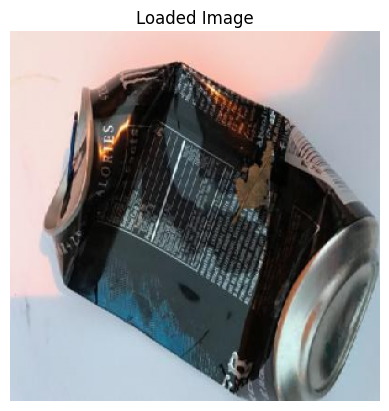

In [27]:
test_img = 'C:/Users/Mohamad Sameer S/Desktop/Data/Test/metal/metal236.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [28]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 1.1 %
GLASS : 2.63 %
METAL : 60.35 %
PAPER : 9.38 %
PLASTIC : 26.37 %
TRASH : 0.16 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Probability: 0.362583
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

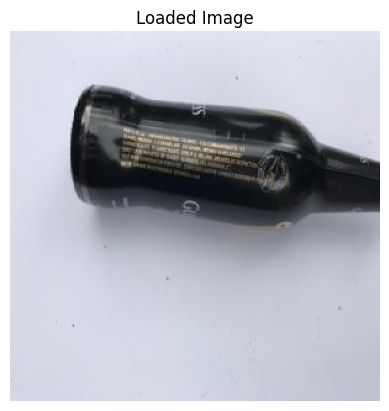

In [29]:
test_img = 'C:/Users/Mohamad Sameer S/Desktop/Data/Test/glass/glass299.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [30]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 3.73 %
GLASS : 29.81 %
METAL : 9.47 %
PAPER : 16.74 %
PLASTIC : 36.26 %
TRASH : 4.0 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Probability: 0.7089339
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

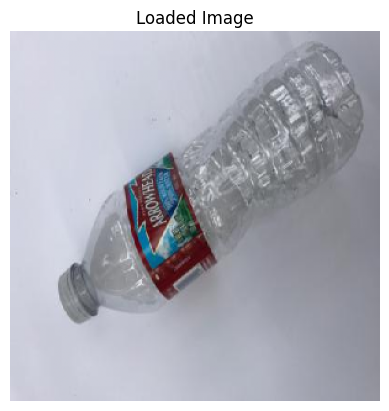

In [32]:
test_img = 'C:/Users/Mohamad Sameer S/Desktop/Data/Test/plastic/plastic227.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [33]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 2.42 %
GLASS : 11.8 %
METAL : 7.05 %
PAPER : 3.92 %
PLASTIC : 70.89 %
TRASH : 3.92 %


## Testing shows that the model is fairly successful in classifying the type of waste

# Saving model as 'model.h5' :-

In [21]:
model.save('weights/model.h5')